In [1]:
  from google.colab import drive
  drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/MyDrive/Colab Notebooks/chatbot_konusma_tanima

/content/gdrive/MyDrive/Colab Notebooks/chatbot_konusma_tanima


In [ ]:
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 51.8 MB/s eta 0:00:00


In [ ]:
!pip install pydub

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from IPython import display
from jiwer import wer
from os import path
from pydub import AudioSegment
import tarfile as tar

**Train ve Test Verileri Bölüşümü**

In [ ]:
metadata_full=pd.read_csv("train_main.csv",sep="\t",header=0,quoting=3)

In [ ]:
metadata_full=metadata_full[["path","sentence"]]
metadata_full

,path,sentence
0,common_voice_tr_28651153,Sabahleyin karşı karşıya gelince dişi söylemek...
1,common_voice_tr_28651158,Güle güle!
2,common_voice_tr_28651159,"Kafamda onun hakkında, biraz evvel beliren ışı..."
3,common_voice_tr_28651160,Ne dersiniz?
4,common_voice_tr_28651161,Beklediğim sesi.
...,...,...
43832,common_voice_tr_18379780,Onları yenmek çok önemli olacak.
43833,common_voice_tr_18379852,Limaj'a bir ay ev hapsi verildi.
43834,common_voice_tr_18379936,"Popov ""Neden?"" diye soruyor."
43835,common_voice_tr_21461823,Belgrad da aynı derecede kuşkulu görünüyor.


In [ ]:
split=int(len(metadata_full)*0.90)
train_data=metadata_full[:split]
test_data=metadata_full[split:]
#test_data=test_data[:1]
#train_data.head(10)

In [ ]:
test_data

,path,sentence
39453,common_voice_tr_25115707,Ne yapabilirim ki?
39454,common_voice_tr_25115708,"Sırbistan, Kosova meclisini feshetti."
39455,common_voice_tr_25115709,Seçimler on dört Nisan Çarşamba günü yapılacak.
39456,common_voice_tr_38144117,Korkunçsun.
39457,common_voice_tr_38144118,Geçen gece için üzgünüm.
...,...,...
43832,common_voice_tr_18379780,Onları yenmek çok önemli olacak.
43833,common_voice_tr_18379852,Limaj'a bir ay ev hapsi verildi.
43834,common_voice_tr_18379936,"Popov ""Neden?"" diye soruyor."
43835,common_voice_tr_21461823,Belgrad da aynı derecede kuşkulu görünüyor.


In [ ]:
train_data

,path,sentence
0,common_voice_tr_28651153,Sabahleyin karşı karşıya gelince dişi söylemek...
1,common_voice_tr_28651158,Güle güle!
2,common_voice_tr_28651159,"Kafamda onun hakkında, biraz evvel beliren ışı..."
3,common_voice_tr_28651160,Ne dersiniz?
4,common_voice_tr_28651161,Beklediğim sesi.
...,...,...
39448,common_voice_tr_25092864,Kuzeyde de durum daha iyi değil.
39449,common_voice_tr_25115681,Tenisçi geçen yıl hiçbir turnuva kazanamadı.
39450,common_voice_tr_25115682,Japon hükümeti tesise maddi yardımda bulundu.
39451,common_voice_tr_25115683,Liderler Kosova konusunda anlaşamadılar.


**Mp3 den Wav Dosyasına Çevirme**

In [ ]:
for i in train_data.path:
  print(i)
  !ffmpeg -i cv-corpus-16.1-2023-12-06/tr/clips/{i}.mp3 -vn -acodec pcm_s16le -ac 1 -ar 16000 -f wav sesler_wav_1000/{i}.wav
for i in test_data.path:
  print(i)
  !ffmpeg -i cv-corpus-16.1-2023-12-06/tr/clips/{i}.mp3 -vn -acodec pcm_s16le -ac 1 -ar 16000 -f wav sesler_wav_1000/{i}.wav


Streaming output truncated to the last 5000 lines.
  Stream #0:0: Audio: mp3, 32000 Hz, mono, fltp, 48 kb/s
Stream mapping:
  Stream #0:0 -> #0:0 (mp3 (mp3float) -> pcm_s16le (native))
Press [q] to stop, [?] for help
Output #0, wav, to 'sesler_wav_1000/common_voice_tr_28904240.wav':
  Metadata:
    ISFT            : Lavf58.76.100
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 16000 Hz, mono, s16, 256 kb/s
    Metadata:
      encoder         : Lavc58.134.100 pcm_s16le
size=     169kB time=00:00:05.39 bitrate= 256.2kbits/s speed= 418x    
video:0kB audio:169kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.045139%
common_voice_tr_28904243
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disabl

**Tokenleştirme**

In [ ]:
karakterler=[x for x in "abcçdefgğhıijklmnoöprsştuüvyz' "]
charnum=keras.layers.StringLookup(vocabulary=karakterler,oov_token="")
numar=keras.layers.StringLookup(vocabulary=charnum.get_vocabulary(),oov_token="",invert=True)
print(charnum.get_vocabulary(),
f"size={charnum.vocabulary_size()}")


['', 'a', 'b', 'c', 'ç', 'd', 'e', 'f', 'g', 'ğ', 'h', 'ı', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'ö', 'p', 'r', 's', 'ş', 't', 'u', 'ü', 'v', 'y', 'z', "'", ' '] size=32


**Wave Dosyalarını Spectrogram Görüntülerine Dönüştürme**

In [ ]:

frame_length = 256
frame_step = 160

fft_length = 384


def spectrogram_donusturme(wav_file, label):

    file = tf.io.read_file("wav_clips/" + wav_file + ".wav")
    audio, _ = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)
    audio = tf.cast(audio, tf.float32)
    spectrogram = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.math.pow(spectrogram, 0.5)
    means = tf.math.reduce_mean(spectrogram, 1, keepdims=True)
    stddevs = tf.math.reduce_std(spectrogram, 1, keepdims=True)
    label = tf.strings.lower(label)
    label = tf.strings.unicode_split(label, input_encoding="UTF-8")
    label = charnum(label)
    return spectrogram, label

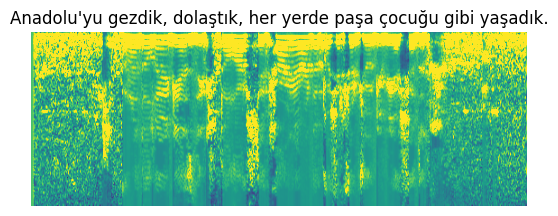

In [ ]:
spectrogram,label=spectrogram_donusturme(train_data["path"][96],train_data["sentence"][96])
spectrogram=np.transpose(spectrogram)
ax = plt.subplot()
ax.imshow(spectrogram,vmax=1)
ax.set_title(train_data["sentence"][96])
ax.axis("off")
plt.savefig('spectrogram_resimler/mel_spec96.png')
plt.show()

In [ ]:
file = tf.io.read_file("wav_clips/" + "common_voice_tr_25092852" + ".wav")
    # 2. Decode the wav file
audio,sample_rate = tf.audio.decode_wav(file)


In [ ]:
print(audio)

<tf.Tensor: shape=(127296, 1), dtype=float32, numpy=
array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       ...,
       [3.0517578e-05],
       [3.0517578e-05],
       [0.0000000e+00]], dtype=float32)>

In [ ]:
print(spectrogram)

tf.Tensor(
[[-3.038979   -1.9533863  -1.0113496  ... -0.06767685 -0.15765293
  -0.19665845]
 [-1.9806134   0.12706922  0.90036106 ...  0.03060018 -0.48708123
  -0.7800493 ]
 [ 0.91239655  0.46999288 -0.91390157 ... -0.50884545 -0.04741497
   0.13113056]
 ...
 [ 1.1769562   1.4943606   1.4525094  ... -0.89851034 -0.7947262
  -0.7390611 ]
 [-1.3069289   0.42598784  1.3174374  ... -0.8757574  -1.4454976
  -1.2283707 ]
 [ 1.1744049   1.4035693   1.8103681  ... -0.4645314  -0.6596297
  -0.7853093 ]], shape=(795, 193), dtype=float32)


In [ ]:
print(label)

<tf.Tensor: shape=(49,), dtype=int64, numpy=
array([22,  1,  2,  1, 10, 15,  6, 28, 12, 17, 33, 14,  1, 21, 23, 11, 33,
       14,  1, 21, 23, 11, 28,  1, 33,  8,  6, 15, 12, 17,  3,  6, 33,  5,
       12, 23, 12, 33, 22, 19, 28, 15,  6, 16,  6, 14,  0,  0,  0])>

In [ ]:
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices(
    (list(train_data["path"]), list(train_data["sentence"]))
)
train_dataset = (
    train_dataset.map(spectrogram_donusturme, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)
validation_dataset = tf.data.Dataset.from_tensor_slices(
    (list(test_data["path"]), list(test_data["sentence"]))
)
validation_dataset = (
    validation_dataset.map(spectrogram_donusturme, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

**MODEL**

In [ ]:
def CTCLoss(y_true,y_pred):
  batch_len=tf.cast(tf.shape(y_true)[0],dtype="int64")
  input_length=tf.cast(tf.shape(y_pred)[1],dtype="int64")
  label_length=tf.cast(tf.shape(y_true)[1],dtype="int64")

  input_length=input_length*tf.ones(shape=(batch_len,1),dtype="int64")
  label_length=label_length*tf.ones(shape=(batch_len,1),dtype="int64")

  loss=keras.backend.ctc_batch_cost(y_true,y_pred,input_length,label_length)
  return loss

In [ ]:
def model_olustur(input_dim, output_dim, rnn_layers=5, rnn_units=128):
  input_spectrogram = layers.Input((None, input_dim), name="input")
  x = layers.Reshape((-1, input_dim, 1), name="expand_dim")(input_spectrogram)
  x = layers.Conv2D(
      filters=32,
      kernel_size=[11, 41],
      strides=[2, 2],
      padding="same",
      use_bias=False,
      name="conv_1",
  )(x)
  x = layers.BatchNormalization(name="conv_1_bn") (x)
  x = layers.ReLU(name="conv_1_relu") (x)
  x = layers.Conv2D(
      filters=32,
      kernel_size=[11, 21],
      strides=[1, 2],
      padding="same",
      use_bias=False,
      name="conv_2",
  )(x)
  x = layers.Reshape((-1, x.shape[-2]*x.shape[-1]))(x)
  for i in range(1, rnn_layers + 1):
    recurrent = layers.GRU(units=rnn_units,activation="tanh",recurrent_activation="sigmoid",use_bias=True,return_sequences=True,reset_after=True,name=f"gru_{i}",)
    x = layers.Bidirectional(recurrent, name=f"bidirectional_{i}", merge_mode="concat")(x)
    if i < rnn_layers:
      x = layers.Dropout(rate=0.5) (x)
  x = layers.Dense(units=rnn_units*2, name="dense_1")(x)
  x = layers.ReLU(name="dense_1_relu")(x)
  x = layers.Dropout (rate=0.5)(x)
  output=layers.Dense(units=output_dim + 1, activation="softmax")(x)
  model=keras.Model(input_spectrogram, output, name="DeepSpeech_2")
  opt=keras.optimizers.Adam(learning_rate=1e-4)
  model.compile(optimizer=opt, loss=CTCLoss)
  return model

model=model_olustur(
    input_dim=fft_length // 2+1,
    output_dim=charnum.vocabulary_size(),
    rnn_units=512,
)
model.summary(line_length=110)

Model: "DeepSpeech_2"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input (InputLayer)                              [(None, None, 193)]                         0                
                                                                                                              
 expand_dim (Reshape)                            (None, None, 193, 1)                        0                
                                                                                                              
 conv_1 (Conv2D)                                 (None, None, 97, 32)                        14432            
                                                                                                              
 conv_1_bn (BatchNormalization)                  (None, None, 97, 32)                     

In [ ]:
model.load_weights("kaydedilen_agirliklar/epoch_100.h5")

**Eğitim Sırasında Değerlendirme İşlemi**

In [ ]:
def decode_batch_predictions(pred):
  input_len=np.ones(pred.shape[0])*pred.shape[1]
  results=keras.backend.ctc_decode(pred,input_length=input_len,greedy=True)[0][0]
  output_text=[]
  for result in results:
    result=tf.strings.reduce_join(numar(result)).numpy().decode("utf-8")
    output_text.append(result)
  return output_text

class CallbackEval(keras.callbacks.Callback):
  def __init__(self,dataset):
    super().__init__()
    self.dataset=dataset

  def on_epoch_end(self,epoch: int,logs=None):
    predictions=[]
    targets=[]
    filename=f"kaydedilen_agirliklar/epoch_{epoch}.h5"
    self.model.save_weights(filename)
    for batch in self.dataset:
      X, y=batch
      batch_predictions=self.model.predict(X)
      batch_predictions=decode_batch_predictions(batch_predictions)
      predictions.extend(batch_predictions)
      for label in y:
        label=(tf.strings.reduce_join(numar(label)).numpy()).decode("utf-8")
        targets.append(label)
    wer_score=wer(targets,predictions)
    eps=epoch+8
    print(f"Epoch Sayisi:{epoch}")
    print("-"*100)
    print(f"Word Error Rate: {wer_score:.4f}")
    print("-"*100)
    for i in np.random.randint(0,len(predictions),30):
      print(f"Hedef :{targets[i]}")
      print(f"Tahmin:{predictions[i]}")
      print("-"*100)


**Modelin Eğitimi**

In [ ]:
epochs=100
validation_callback=[CallbackEval(validation_dataset), keras.callbacks.ModelCheckpoint('model_checkpoint/ckpt_epoch{epoch:02d}.weights.h5',save_freq="epoch",save_weights_only=True)]
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[validation_callback],
    initial_epoch=0
)
#basarim=model.evaluate(train_dataset,validation_data)

Epoch 1/50
1/1 [==============================] - 0s 274ms/step
Epoch Sayisi:0
----------------------------------------------------------------------------------------------------
Word Error Rate: 1.0000
----------------------------------------------------------------------------------------------------
Target    :şte adresi
Prediction:işaei
----------------------------------------------------------------------------------------------------
Target    :çeri girmeliyiz
Prediction:eeeeii
----------------------------------------------------------------------------------------------------
Target    :ne oluyor be
Prediction: oyori
----------------------------------------------------------------------------------------------------
Target    :yaklaşık yüz bin etnik sırp hl duruyor
Prediction:ykoşebieis aaduyor
----------------------------------------------------------------------------------------------------
Target    :limaj'a bir ay ev hapsi verildi
Prediction:aaaabi easıbei
----------------

KeyboardInterrupt: 

In [ ]:
epochs=100
validation_callback=CallbackEval(validation_dataset)
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[validation_callback],
    initial_epoch=15
)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
1/1 [==============================] - 0s 90ms/step
Epoch Sayisi:29
----------------------------------------------------------------------------------------------------
Word Error Rate: 0.6604
----------------------------------------------------------------------------------------------------
Hedef   :akı karası geçitte belli olur
Tahmin:akı karasın geçik de behli olur
----------------------------------------------------------------------------------------------------
Hedef   :bu sistem iç baskı ve gerginlikleri yumuşatmıştı
Tahmin:bu sisten biç baslıva gelgenlikleriğimisapıştu
----------------------------------------------------------------------------------------------------
Hedef   :bir ailen var
Tahmin:bir ayden var
----------------------------------------------------------------------------------------------------
Hedef   :yi bir fikirdi
Tahmin:ye bir sikirdi
----------------------------------------------------------------------------

In [ ]:
epochs=100
validation_callback=CallbackEval(validation_dataset)
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[validation_callback],
    initial_epoch=51
)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 92ms/step
Epoch Sayisi:51
----------------------------------------------------------------------------------------------------
Word Error Rate: 0.6198
----------------------------------------------------------------------------------------------------
Hedef   :bitirin işlerini
Tahmin:bitirin işlerini
----------------------------------------------------------------------------------------------------
Hedef   :aşağıdan gölün üzerinden kahkahalar geliyordu
Tahmin:aşağıdan gönün üzerinden kahkahalar geliyordu
----------------------------------------------------------------------------------------------------
Hedef   :brady tahvilleri de bu dönemden kalma bir miras
Tahmin:reni tahbilleri de bu dönemlen kalma bir miras
----------------------------------------------------------------------------------------------------
Hedef   :ve gizlemeye çalışmıyor
Tahmin:ve hizlemeye çalışmıyor
-------------------

In [ ]:
epochs=101
validation_callback=CallbackEval(validation_dataset)
#validation_callback=[CallbackEval(validation_dataset), keras.callbacks.Mode]
#validation_callback=[CallbackEval(validation_dataset), keras.callbacks.ModelCheckpoint('model_checkpoint/ckpt_epoch{epoch:02d}.keras',save_freq="epoch",save_weights_only=False)]
#validation_callback=[CallbackEval(validation_dataset), keras.callbacks.ModelCheckpoint('model_checkpoint/ckpt_epoch{epoch:02d}.weights.h5',save_freq="epoch",save_weights_only=True)]
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[validation_callback],
    initial_epoch=73
)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
1/1 [==============================] - 0s 88ms/step
Epoch Sayisi:79
----------------------------------------------------------------------------------------------------
Word Error Rate: 0.6029
----------------------------------------------------------------------------------------------------
Hedef :ben şaka yapmıyorum
Tahmin:ben saka yapmıyorum
----------------------------------------------------------------------------------------------------
Hedef :gereksiz askeri mülkler elden çıkarılıyor
Tahmin:geriksiz askeli mükler haldel çıkaralıyor
----------------------------------------------------------------------------------------------------
Hedef :ama böyle olmadı
Tahmin:tama böyle olmadı
----------------------------------------------------------------------------------------------------
Hedef :sırbistan'da seksen bir adet kayıtlı parti bulunuyor
Tahmin:sırbistan'da sesten bir hazet kayıtsa partı bulunuyor
----------------------------------

**Modelin Test Edilmesi**

In [ ]:
predictions=[]
targets=[]
for batch in validation_dataset:
  X, y=batch
  batch_predictions=model.predict(X)
  batch_predictions=decode_batch_predictions(batch_predictions)
  predictions.extend(batch_predictions)
  for label in y:
    label=(tf.strings.reduce_join(numar(label)).numpy()).decode("utf-8")
    targets.append(label)
wer_score=wer(targets,predictions)
print("-"*100)
print(f"Word Error Rate: {wer_score:.4f}")
print("-"*100)
for i in np.random.randint(0,len(predictions),200):
  print(f"Target    :{targets[i]}")
  print(f"Prediction:{predictions[i]}")
  print("-"*100)

1/1 [==============================] - 0s 89ms/step
----------------------------------------------------------------------------------------------------
Word Error Rate: 0.5944
----------------------------------------------------------------------------------------------------
Target    :çki perakende sektörü içindeki tepkiler karışık
Prediction:çkipara kendi sektörü içindeki tespitlar kanışık
----------------------------------------------------------------------------------------------------
Target    :tüm bu yemekler için para gerekiyor
Prediction:tüm bu yimi bi üzün para ketekiyor
----------------------------------------------------------------------------------------------------
Target    :bu akşam vaziyet fena
Prediction:bu akşamız yat şena
----------------------------------------------------------------------------------------------------
Target    :on seneden beri belki boşuna yere herkesten kaçmışım insanlara inanmamakta haksızlık etmişim
Prediction:on seneden beri belki boşuna